# ___Convolutional Neural Network (CNN)___

## ___What are Convolutional Neural Networks (CNN)?___

_Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars._

_CNN architecture is inspired by the organization and functionality of the visual cortex and designed to mimic the connectivity pattern of neurons within the human brain._

_The neurons within a CNN are split into structures, with each set of neurons analyzing a small region or feature of the image. In other words, each group of neurons specializes in identifying one part of the image. CNNs use the predictions from the layers to produce a final output that presents a vector of probability scores to represent the likelihood that a specific feature belongs to a certain class._

_A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features._

_Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization._

_There are two aspects of this computation worth paying attention to: __Location Invariance__ and __Compositionality__._

_Let’s say you want to classify whether or not there’s an elephant in an image. Because you are sliding your filters over the whole image you don’t really care where the elephant occurs. In practice,  pooling also gives you invariance to translation, rotation and scaling, but more on that later. The second key aspect is (local) compositionality. Each filter composes a local patch of lower-level features into higher-level representation. That’s why CNNs are so powerful in Computer Vision. It makes intuitive sense that you build edges from pixels, shapes from edges, and more complex objects from shapes._

## ___Why ConvNets over Feed-Forward Neural Nets?___

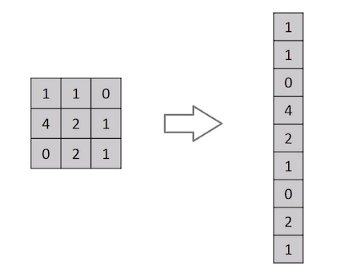

_An image is nothing but a matrix of pixel values, right? So why not just flatten the image (e.g. 3x3 image matrix into a 9x1 vector) and feed it to a Multi-Level Perceptron for classification purposes? Uh.. not really._

_In cases of extremely basic binary images, the method might show an average precision score while performing prediction of classes but would have little to no accuracy when it comes to complex images having pixel dependencies throughout._

_A Convolutional Neural Networks is able to successfully capture the __Spatial__ and __Temporal__ dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better._

## ___Intuition___

_Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches._

_Let’s say we wanted to classify the following image of a dog as a Golden Retriever:_

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377b77_dog-1210559-1280/dog-1210559-1280.jpg" width="500" height="500">

_As humans, how do we do this?_

_One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog._

_In this case, we might break down the image into a combination of the following:_

* _A nose_
* _Two eyes_
* _Golden fur_

_These pieces can be seen below:_

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bdb_screen-shot-2016-11-24-at-12.49.08-pm/screen-shot-2016-11-24-at-12.49.08-pm.png" width="250" height="250">
<center><i>The eye of the dog.</i></center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bed_screen-shot-2016-11-24-at-12.49.43-pm/screen-shot-2016-11-24-at-12.49.43-pm.png" width="250" height="250">
<center><i>The nose of the dog.</i></center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bff_screen-shot-2016-11-24-at-12.50.54-pm/screen-shot-2016-11-24-at-12.50.54-pm.png" width="250" height="250">
<center><i>The fur of the dog.</i></center>

___Going One Step Further___

_But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below:_

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c52_screen-shot-2016-11-24-at-12.51.47-pm/screen-shot-2016-11-24-at-12.51.47-pm.png">
<center><i>A curve that we can use to determine a nose</i></center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c68_screen-shot-2016-11-24-at-12.51.51-pm/screen-shot-2016-11-24-at-12.51.51-pm.png">
<center><i>A nostril that we can use to classify the nose of the dog</i></center>

_Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects._

_In our case, the levels in the hierarchy are:_

* _Simple shapes, like ovals and dark circles_
* _Complex objects (combinations of simple shapes), like eyes, nose, and fur_
* _The dog as a whole (a combination of complex objects)_

_With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!_

_It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for._

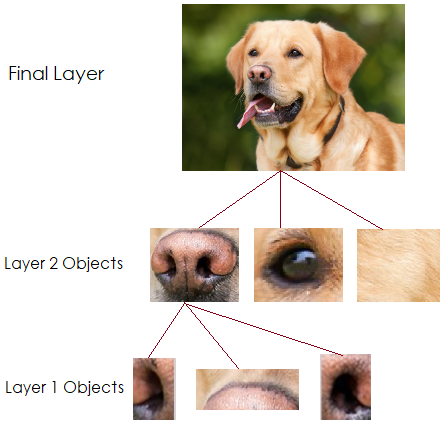
<center><i>An example of what each layer in a CNN might recognize when classifying a picture of a dog</i></center>

_A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs._

_Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for._

## ___Understanding Convolutional Network Operations___

_There are four main operations in the Convolutional Neural Networks:_

* ___Convolution___
* ___Pooling or Sub Sampling___
* ___Flattening___
* ___Classification (Fully Connected Layer)___

_These operations are the basic building blocks of every Convolutional Neural Network, so understanding how these work is an important step to developing a sound understanding._

<img src='https://miro.medium.com/max/700/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg'/>

### ___Input Image___
_Essentially, every image can be represented as a matrix of pixel values._

<img src='https://miro.medium.com/max/400/1*15yDvGKV47a0nkf5qLKOOQ.png'/>

_In the figure, we have an RGB image which has been separated by its three color planes — Red, Green, and Blue. There are a number of such color spaces in which images exist - __Grayscale, RGB, HSV, CMYK__, etc._

_You can imagine how computationally intensive things would get once the images reach dimensions, say 8K (7680×4320). __The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.__ This is important when we are to design an architecture which is not only good at learning features but also is scalable to massive datasets._

___Channel___ _is a conventional term used to refer to a certain component of an image. An image from a standard digital camera will have three channels – red, green and blue – you can imagine those as three 2d-matrices stacked over each other (one for each color), each having pixel values in the range 0 to 255._

<img src='https://ujwlkarn.files.wordpress.com/2016/08/8-gif.gif?w=192&h=192'/>

_A __grayscale__ image, on the other hand, has just one channel. For the purpose of this post, we will only consider grayscale images, so we will have a single 2d matrix representing an image. The value of each pixel in the matrix will range from 0 to 255 – zero indicating black and 255 indicating white._

### ___The Convolution Step___

___Convolution Networks derive their name from the “convolution” operation.___ _The primary purpose of Convolution in case of a ConvNet is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data._

_As we discussed above, every image can be considered as a matrix of pixel values. Consider a 5 x 5 image whose pixel values are only 0 and 1 (note that for a grayscale image, pixel values range from 0 to 255, the green matrix below is a special case where pixel values are only 0 and 1):_

<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-13-pm.png?w=127&h=115'/>

_Also, consider another 3 x 3 matrix as shown below:_

<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'/>

_Then, the Convolution of the 5 x 5 image and the 3 x 3 matrix can be computed as shown in the animation in Figure 5 below:_

<img src= 'https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196'/>

_Take a moment to understand how the computation above is being done. We slide the orange matrix over our original image (green) by 1 pixel (also called __‘stride’__) and for every position, we compute element wise multiplication (between the two matrices) and add the multiplication outputs to get the final integer which forms a single element of the output matrix (pink). Note that the 3×3 matrix “sees” only a part of the input image in each stride._

_In CNN terminology, the 3×3 matrix is called a __‘filter‘__ or __‘kernel’__ or __‘feature detector’__ and the matrix formed by sliding the filter over the image and computing the dot product is called the __‘Convolved Feature’__ or __‘Activation Map’__ or the __‘Feature Map‘__. It is important to note that filters acts as feature detectors from the original input image._

_It is evident from the animation above that different values of the filter matrix will produce different Feature Maps for the same input image._

_As an example, consider the following input image:_

<img src='https://ujwlkarn.files.wordpress.com/2016/08/111.png?w=67&h=66'/>

_In the table below, we can see the effects of convolution of the above image with different filters. As shown, we can perform operations such as Edge Detection, Sharpen and Blur just by changing the numeric values of our filter matrix before the convolution operation – this means that different filters can detect different features from an image, for example edges, curves etc._

<img src='https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-05-at-11-03-00-pm.png?w=342&h=562'/>

_Another good way to understand the Convolution operation is by looking at the animation below:_

<img src='https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif?w=748'/>

_A filter (with red outline) slides over the input image (convolution operation) to produce a feature map. The convolution of another filter (with the green outline), over the same image gives a different feature map as shown. It is important to note that the Convolution operation captures the local dependencies in the original image. Also notice how these two different filters generate different feature maps from the same original image. Remember that the image and the two filters above are just numeric matrices as we have discussed above._

_In practice, a CNN learns the values of these filters on its own during the training process (although we still need to specify parameters such as number of filters, filter size, architecture of the network etc. before the training process). The more number of filters we have, the more image features get extracted and the better our network becomes at recognizing patterns in unseen images._

_The size of the Feature Map (Convolved Feature) is controlled by three parameters that we need to decide before the convolution step is performed:_

* ___Depth___ _: Depth corresponds to the number of filters we use for the convolution operation. In the network shown, we are performing convolution of the original boat image using three distinct filters, thus producing three different feature maps as shown. You can think of these three feature maps as stacked 2d matrices, so, the ‘depth’ of the feature map would be three._

<img src='https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-42-35-am.png?w=401&h=201'/>


* ___Stride___ _: Stride is the number of pixels by which we slide our filter matrix over the input matrix. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2, then the filters jump 2 pixels at a time as we slide them around. Having a larger stride will produce smaller feature maps._


* ___Zero-padding___ _: Sometimes, it is convenient to pad the input matrix with zeros around the border, so that we can apply the filter to bordering elements of our input image matrix. A nice feature of zero padding is that it allows us to control the size of the feature maps. Adding zero-padding is also called __wide convolution__, and not using zero-padding would be a __narrow convolution__._

_In the case of images with multiple channels (e.g. RGB), the Kernel has the same depth as that of the input image. Matrix Multiplication is performed between Kn and In stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output._

<img src='https://miro.medium.com/max/512/1*ciDgQEjViWLnCbmX-EeSrA.gif'/>

_The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. Convolutional Neural Networks need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would._

<img src='https://miro.medium.com/max/316/1*1VJDP6qDY9-ExTuQVEOlVg.gif'/>

_There are two types of results to the operation — one in which the convolved feature is reduced in dimensionality as compared to the input, and the other in which the dimensionality is either increased or remains the same. This is done by applying __Valid Padding__ in case of the former, or __Same Padding__ in the case of the latter._

___What is Padding?___

_Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN. For example, if the padding in a CNN is set to zero, then every pixel value that is added will be of value zero. If, however, the zero padding is set to one, there will be a one pixel border added to the image with a pixel value of zero._

<img src='https://images.deepai.org/django-summernote/2019-05-27/c3f24854-5584-4feb-81d7-3bcc5800a689.png'/>

___How does Padding work?___

_Padding works by extending the area of which a convolutional neural network processes an image. The kernel is the neural networks filter which moves across the image, scanning each pixel and converting the data into a smaller, or sometimes larger, format. In order to assist the kernel with processing the image, padding is added to the frame of the image to allow for more space for the kernel to cover the image. Adding padding to an image processed by a CNN allows for more accurate analysis of images._

___Types of Padding___

* ___Valid Padding___ _: It implies no padding at all. The input image is left in its valid/unaltered shape._
* ___Same Padding___ _: In this case, we add ‘p’ padding layers such that the output image has the same dimensions as the input image._
* ___Other Paddings___ _:Causal padding, Constant padding, Reflection padding, Replication padding_

___Dimensionality___

_For a gray scale (n x n) image and (f x f) filter/kernel, the dimensions of the image resulting from a convolution operation is `(n – f + 1) x (n – f + 1)`._

_For example, for an (8 x 8) image and (3 x 3) filter, the output resulting after convolution operation would be of size (6 x 6). Thus, the image shrinks every time a convolution operation is performed._

_With Padding, applying convolution-operation (with (f x f) filter) outputs `(n + 2p – f + 1) x (n + 2p – f + 1)` images. For example, adding one layer of padding to an (8 x 8) image and using a (3 x 3) filter we would get an (8 x 8) output after performing convolution operation._

_From what we've learned so far, how can we calculate the number of neurons of each layer in our CNN?_

_Given our input layer has a volume of `W`, our filter has a volume `(height * width * depth)` of `F`, we have a stride of `S`, and a padding of `P`, the following formula gives us the volume of the next layer: `(W−F+2P)/S+1`._

_Knowing the dimensionality of each additional layer helps us understand how large our model is and how our decisions around filter size and stride affect the size of our network_

### ___Non Linearity (ReLU)___

_An additional operation called ReLU has been used after every Convolution operation in Figure 3 above. ReLU stands for Rectified Linear Unit and is a non-linear operation. Its output is given by:_

<img src='https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-2-23-48-am.png?w=537&h=168'/>

_ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLU is to introduce non-linearity in our ConvNet, since most of the real-world data we would want our ConvNet to learn would be non-linear (Convolution is a linear operation – element wise matrix multiplication and addition, so we account for non-linearity by introducing a non-linear function like ReLU)._

_The ReLU operation can be understood clearly from Figure below. It shows the ReLU operation applied to one of the feature maps obtained above. The output feature map here is also referred to as the ‘Rectified’ feature map._

<img src='https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-18-19-pm.png?w=748'/>

_Other non linear functions such as tanh or sigmoid can also be used instead of ReLU, but ReLU has been found to perform better in most situations._

### ___Pooling Step___

_Spatial Pooling (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc._

_In case of Max Pooling, we define a spatial neighborhood (for example, a 2×2 window) and take the largest element from the rectified feature map within that window. Instead of taking the largest element we could also take the average (Average Pooling) or sum of all elements in that window. In practice, Max Pooling has been shown to work better._

<img src='https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=494'/>

<img src='https://miro.medium.com/max/400/1*KQIEqhxzICU7thjaQBfPBQ.png'/>

_We slide our 2 x 2 window by 2 cells (also called ‘stride’) and take the maximum value in each region. As shown, this reduces the dimensionality of our feature map._

<img src='https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-11-53-pm.png?w=748'/>

_The function of Pooling is to progressively reduce the spatial size of the input representation. In particular, pooling_

* _makes the input representations (feature dimension) smaller and more manageable_


* _reduces the number of parameters and computations in the network, therefore, controlling overfitting._


* _makes the network invariant to small transformations, distortions and translations in the input image (a small distortion in input will not change the output of Pooling – since we take the maximum / average value in a local neighborhood)._


* _helps us arrive at an almost scale invariant representation of our image (the exact term is “equivariant”). This is very powerful since we can detect objects in an image no matter where they are located._

### ___Flattening___

_Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. In other words, we put all the pixel data in one line and make connections with the final layer. Rectangular or cubic shapes can't be direct inputs. And this is why we need flattening and fully-connected layers._

### ___Fully Connected Layer___
_The Fully Connected layer is a traditional Multi Layer Perceptron that uses a softmax activation function in the output layer (other classifiers like SVM can also be used, but will stick to softmax in this post). The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer._

<img src='https://miro.medium.com/max/554/1*Mw6LKUG8AWQhG73H1caT8w.png'/>

_The output from the convolutional and pooling layers represent high-level features of the input image. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset._

_Apart from classification, adding a fully-connected layer is also a (usually) cheap way of learning non-linear combinations of these features. Most of the features from convolutional and pooling layers may be good for the classification task, but combinations of those features might be even better._

_The sum of output probabilities from the Fully Connected Layer is 1. This is ensured by using the Softmax as the activation function in the output layer of the Fully Connected Layer. The Softmax function takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one that sum to one._

### ___Overall Training___

_The overall training process of the Convolution Network may be summarized as below:_

* ___Step1___ _: We initialize all filters and parameters / weights with random values_


* ___Step2___ _: The network takes a training image as input, goes through the forward propagation step (convolution, ReLU and pooling operations along with forward propagation in the Fully Connected layer) and finds the output probabilities for each class._
    * _Lets say the output probabilities for the boat image above are [0.2, 0.4, 0.1, 0.3]_
    * _Since weights are randomly assigned for the first training example, output probabilities are also random._


* ___Step3___ _: Calculate the total error at the output layer (summation over all 4 classes)_
     $$Total Error = ∑  ½ (target probability – output probability) ²$$


* ___Step4___ _: Use Backpropagation to calculate the gradients of the error with respect to all weights in the network and use gradient descent to update all filter values / weights and parameter values to minimize the output error._
    * _The weights are adjusted in proportion to their contribution to the total error._
    * _When the same image is input again, output probabilities might now be [0.1, 0.1, 0.7, 0.1], which is closer to the target vector [0, 0, 1, 0]._
    * _This means that the network has learnt to classify this particular image correctly by adjusting its weights / filters such that the output error is reduced._
    * _Parameters like number of filters, filter sizes, architecture of the network etc. have all been fixed before Step 1 and do not change during training process – only the values of the filter matrix and connection weights get updated._


* ___Step5___ _: Repeat steps 2-4 with all images in the training set._

_The above steps train the ConvNet – this essentially means that all the weights and parameters of the ConvNet have now been optimized to correctly classify images from the training set._

_When a new (unseen) image is input into the ConvNet, the network would go through the forward propagation step and output a probability for each class (for a new image, the output probabilities are calculated using the weights which have been optimized to correctly classify all the previous training examples). If our training set is large enough, the network will (hopefully) generalize well to new images and classify them into correct categories._

## ___Visualizing CNNs___

_Let’s look at an example CNN to see how it works in action._

_The CNN we will look at is trained on ImageNet as described in [this paper](http://www.matthewzeiler.com/pubs/arxive2013/eccv2014.pdf) by Zeiler and Fergus. In the images below (from the same paper), we’ll see what each layer in this network detects and see *how* each layer detects more and more complex ideas._

### ___Layer 1___

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbd42_layer-1-grid/layer-1-grid.png)
<center><i>Example patterns that cause activations in the first layer of the network. These range from simple diagonal lines (top left) to green blobs (bottom middle).</i></center>

_The images above are from Matthew Zeiler and Rob Fergus' [Deep Visualization Toolbox](https://www.youtube.com/watch?v=ghEmQSxT6tw), which lets us visualize what each layer in a CNN focuses on._

_Each image in the above grid represents a pattern that causes the neurons in the first layer to activate - in other words, they are patterns that the first layer recognizes. The top left image shows a -45 degree line, while the middle top square shows a +45 degree line. These squares are shown below again for reference:_

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbba2_diagonal-line-1/diagonal-line-1.png)
<center><i>As visualized here, the first layer of the CNN can recognize -45 degree lines.</i></center>
<br>

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbc02_diagonal-line-2/diagonal-line-2.png)
<center><i>The first layer of the CNN is also able to recognize +45 degree lines, like the one above.</i></center>

_Let's now see some example images that cause such activations. The below grid of images all activated the -45 degree line. Notice how they are all selected despite the fact that they have different colors, gradients, and patterns._

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbace_grid-layer-1/grid-layer-1.png)
<center><i>Example patches that activate the -45 degree line detector in the first layer.</i></center>

_So, the first layer of our CNN clearly picks out very simple shapes and patterns like lines and blobs._

### ___Layer 2___

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583780f3_screen-shot-2016-11-24-at-12.09.02-pm/screen-shot-2016-11-24-at-12.09.02-pm.png" width=700 height=700>
<center><i>A visualization of the second layer in the CNN. Notice how we are picking up more complex ideas like circles and stripes. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</i></center>

_The second layer of the CNN captures complex ideas._

_As you see in the image above, the second layer of the CNN recognizes circles (second row, second column), stripes (first row, second column), and rectangles (bottom right)._

_**The CNN learns to do this on its own**. There is no special instruction for the CNN to focus on more complex objects in deeper layers. That's just how it normally works out when you feed training data into a CNN._

### ___Layer 3___

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837811f_screen-shot-2016-11-24-at-12.09.24-pm/screen-shot-2016-11-24-at-12.09.24-pm.png" width=700 height=700>
<center><i>A visualization of the third layer in the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</i></center>

_The third layer picks out complex combinations of features from the second layer. These include things like grids, and honeycombs (top left), wheels (second row, second column), and even faces (third row, third column)._

### ___Layer 5___

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58378151_screen-shot-2016-11-24-at-12.08.11-pm/screen-shot-2016-11-24-at-12.08.11-pm.png" width=500 height=500>
<center><i>A visualization of the fifth and final layer of the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</i></center>

_We'll skip layer 4, which continues this progression, and jump right to the fifth and final layer of this CNN._

_The last layer picks out the highest order ideas that we care about for classification, like dog faces, bird faces, and bicycles._

## ___Introduction to the ImageNet Challenge (ILSVRC)___

_The rise in popularity and use of deep learning neural network techniques can be traced back to the innovations in the application of convolutional neural networks to image classification tasks._

_Some of the most important innovations have sprung from submissions by academics and industry leaders to the ImageNet Large Scale Visual Recognition Challenge, or ILSVRC. The ILSVRC is an annual computer vision competition developed upon a subset of a publicly available computer vision dataset called ImageNet. As such, the tasks and even the challenge itself is often referred to as the ImageNet Competition._

* _The [ImageNet](http://www.image-net.org/) dataset is a very large collection of human annotated photographs designed by academics for developing computer vision algorithms._
* _The ImageNet Large Scale Visual Recognition Challenge, or ILSVRC, is an annual competition that uses subsets from the ImageNet dataset and is designed to foster the development and benchmarking of state-of-the-art algorithms._
* _The ILSVRC tasks have led to milestone model architectures and techniques in the intersection of computer vision and deep learning._

_The ImageNet Large Scale Visual Recognition Challenge or ILSVRC for short is an annual competition helped between 2010 and 2017 in which challenge tasks use subsets of the ImageNet dataset._

_The goal of the challenge was to both promote the development of better computer vision techniques and to benchmark the state of the art._

_The annual challenge focuses on multiple tasks for “image classification” that includes both assigning a class label to an image based on the main object in the photograph and “object detection” that involves localizing objects within the photograph._

_The general challenge tasks for most years are as follows:_

* ___Image classification___ _: Predict the classes of objects present in an image._
* ___Single-object localization___ _: Image classification + draw a bounding box around one example of each object present._
* ___Object detection___ _: Image classification + draw a bounding box around each object present._

## ___Convolutional Network Architectures___

_Convolutional Neural Networks have been around since early 1990s. We discussed the LeNet above which was one of the very first convolutional neural networks. Some other influential architectures are listed below:_

* ___LeNet (1990s)___ _: First ever architecture inplace for Convolutional Neural Networks._


* ___1990s to 2012___ _: In the years from late 1990s to early 2010s convolutional neural network were in incubation. As more and more data and computing power became available, tasks that convolutional neural networks could tackle became more and more interesting._


* ___AlexNet (2012)___ _: In 2012, Alex Krizhevsky (and others) released AlexNet which was a deeper and much wider version of the LeNet and won by a large margin the difficult ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012. It was a significant breakthrough with respect to the previous approaches and the current widespread application of CNNs can be attributed to this work._


* ___ZF Net (2013)___ _: The ILSVRC 2013 winner was a Convolutional Network from Matthew Zeiler and Rob Fergus. It became known as the ZFNet (short for Zeiler & Fergus Net). It was an improvement on AlexNet by tweaking the architecture hyperparameters._


* ___GoogLeNet (2014)___ _: The ILSVRC 2014 winner was a Convolutional Network from Szegedy et al. from Google. Its main contribution was the development of an Inception Module that dramatically reduced the number of parameters in the network (4M, compared to AlexNet with 60M)._


* ___VGGNet (2014)___ _: The runner-up in ILSVRC 2014 was the network that became known as the VGGNet. Its main contribution was in showing that the depth of the network (number of layers) is a critical component for good performance._


* ___ResNets (2015)___ _: Residual Network developed by Kaiming He (and others) was the winner of ILSVRC 2015. ResNets are currently by far state of the art Convolutional Neural Network models and are the default choice for using ConvNets in practice (as of May 2016)._


* ___DenseNet (August 2016)___ _: Recently published by Gao Huang (and others), the Densely Connected Convolutional Network has each layer directly connected to every other layer in a feed-forward fashion. The DenseNet has been shown to obtain significant improvements over previous state-of-the-art architectures on five highly competitive object recognition benchmark tasks._

## ___Data Augmentation Techniques___

_By now, we’re all probably numb to the importance of data in ConvNets, so let’s talk about ways that you can make your existing dataset even larger, just with a couple easy transformations. Like we’ve mentioned before, when a computer takes an image as an input, it will take in an array of pixel values._

_Let’s say that the whole image is shifted left by 1 pixel. To you and me, this change is imperceptible. However, to a computer, this shift can be fairly significant as the classification or label of the image doesn’t change, while the array does._ 

_Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as __data augmentation techniques__._ 

_They are a way to artificially expand your dataset. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more. By applying just a couple of these transformations to your training data, you can easily double or triple the number of training examples._

## ___Few Practical Visualization Links___

1. ___[NETRON](https://lutzroeder.github.io/netron/)___ _: Online and offline tool to visualize your Deep Learning models._

2. ___[TensorSpace](https://tensorspace.org/html/playground/index.html)___ _: Online tool to visualize and experiment the CNN architectures._

3. ___[CNN Explainer](https://poloclub.github.io/cnn-explainer/)___ _:Learn and visualize CNN models and layers._